In [629]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier


Importam dataframe-ul

In [630]:
data=pd.read_csv("https://raw.githubusercontent.com/Edd127/Datasets/main/ENB2012_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


Acest studiu a analizat eficienta energetica de încalzire si eficienta energetica de racire ale cladirilor  in functie de parametrii cladirii.

Setul de date contine opt atribute notate cu X1 ... X8 si doua rezultate notate cu y1 si y2.

Acesta cuprinde 768 de esantioane si 8 atribute, cu scopul de a prezice doua raspunsuri reale, adica y1 si y2



Vom verifica daca exista valori nule

In [631]:
data.isnull().any()

X1    False
X2    False
X3    False
X4    False
X5    False
X6    False
X7    False
X8    False
Y1    False
Y2    False
dtype: bool

Redenumim atributele pentru o citire mult mai buna

In [632]:
data.columns = ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height',
                'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load']

Heating Load este cantitatea de energie termica care ar trebui adaugata intr-un spatiu pentru a mentine temperatura la un nivel acceptabil

Cooling Load este cantitatea de energie termica care ar trebui eliminata dintr-un spatiu pentru a mentine temperatura la un nivel acceptabil

# 1.Analiza Exploatorie

Folosind functia describe, vom avea o perspectiva generala asupra setului de date

In [633]:
data.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


Dorim sa vedem cate date sunt unice

In [634]:
data.nunique()

Relative_Compactness          12
Surface_Area                  12
Wall_Area                      7
Roof_Area                      4
Overall_Height                 2
Orientation                    4
Glazing_Area                   4
Glazing_Area_Distribution      6
Heating_Load                 586
Cooling_Load                 636
dtype: int64

Vom analiza in continuare corelatiile dintre atribute folosindu-ne de o reprezentare heatmap

<AxesSubplot:>

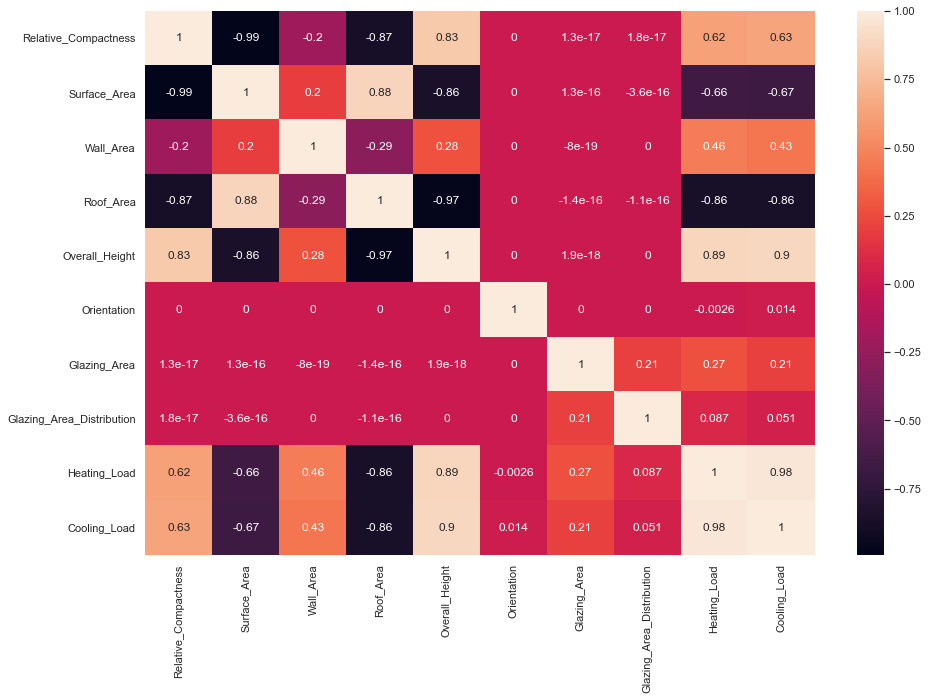

In [635]:
sns.set(rc={'figure.figsize':(15,10)}) 
sns.heatmap(data.corr(), annot=True)

Relative Compactness are o corelatie de 0.62 cu Heating_Load, respectiv 0.63 cu Cooling Load si o corelatie de 0.83 cu Overall Height. 
Roof Area are o corelatie de 0.88 cu Surface Area.
Overall Height are o corelatie de 0.89 cu Heating_Load, respectiv 0.9 cu Cooling Load.

Toate aceste corelatii sunt corelatii pozitive. 


Corelatiile negative sunt reprezentate de :
Surface Area si Relative Compactness (-0.99), Roof Area si Relative Compactness (-0.99), Overall Height cu Surface Area(-0.86)si (-0.97) cu Roof Area.

In [636]:
coloane = [0,4,8,9]
nou = data[data.columns[coloane]]

nou

,Relative_Compactness,Overall_Height,Heating_Load,Cooling_Load
0,0.98,7.0,15.55,21.33
1,0.98,7.0,15.55,21.33
2,0.98,7.0,15.55,21.33
3,0.98,7.0,15.55,21.33
4,0.90,7.0,20.84,28.28
...,...,...,...,...
763,0.64,3.5,17.88,21.40
764,0.62,3.5,16.54,16.88
765,0.62,3.5,16.44,17.11
766,0.62,3.5,16.48,16.61


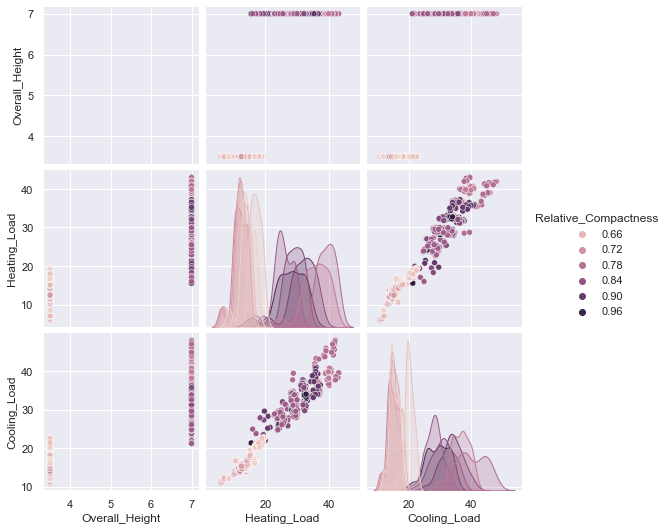

In [637]:
sns.pairplot(nou, hue="Relative_Compactness")

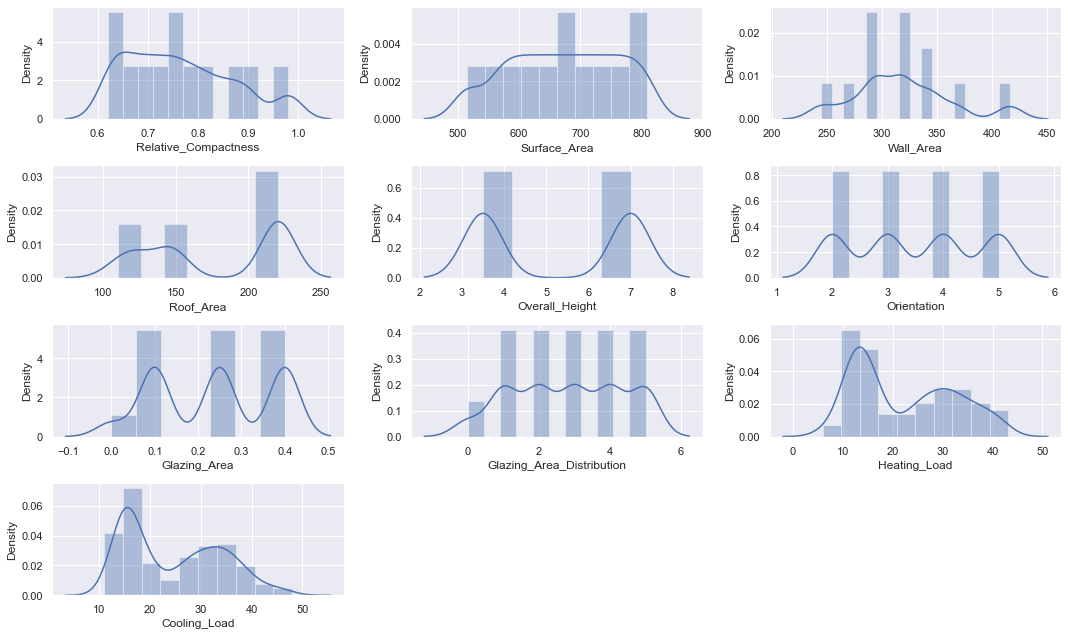

In [638]:
fig = plt.figure(figsize = (15,9))
for a,b in enumerate(data.columns):
    ax = fig.add_subplot(4,3,a+1)
    sns.distplot(data[b])
plt.tight_layout()

Dorim sa vedem cum se clasifica cladirile in functie de cat de eficient este folosita energia. Pentru acest lucru vom face o clasificare a acestora in 3 clase: 
-Clasa 0 -> acestea sunt eficiente
-Clasa 1 -> acestea folosesc energia intr-un mod neutru
-Clasa 2 -> acestea nu sunt eficiente

Pentru acest lucru vom imparti setul de date in 2 si vom verifica daca avem valori nule

In [639]:
X = data[['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height',
                'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution']]
Y = data[[ 'Heating_Load', 'Cooling_Load']]
Y1=data[['Heating_Load']]
Y2=data[['Cooling_Load']]
print(X.isnull().sum())

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
dtype: int64


Calculam suma dintre heating load si cooling load pentru a vedea consumul de energie. Daca overall_load(consumul total de energie) este mai mic decat 42 - cladirile vor intra in class 0, daca consumul total de energie este > 70, acestea vor intra in class 2, iar restul vor intra in class 1

In [640]:
Z = data[['Heating_Load','Cooling_Load']]


Z['Overall_load'] = Z['Heating_Load'] + Z['Cooling_Load']
Z['class'] = 1

Z.loc[Z.Overall_load < 42,['class']] = 0
Z.loc[Z.Overall_load > 70 , ['class']] = 2


yclass=Z['class']

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, yclass,  )


Vom scala datele pentru o prezicere mult mai buna

In [641]:
from sklearn.preprocessing import MinMaxScaler
MinMax = MinMaxScaler(feature_range= (0,1))
X_train_class = MinMax.fit_transform(X_train_class)
X_test_class = MinMax.transform(X_test_class)

print(Z)

     Heating_Load  Cooling_Load  Overall_load  class
0           15.55         21.33         36.88      0
1           15.55         21.33         36.88      0
2           15.55         21.33         36.88      0
3           15.55         21.33         36.88      0
4           20.84         28.28         49.12      1
..            ...           ...           ...    ...
763         17.88         21.40         39.28      0
764         16.54         16.88         33.42      0
765         16.44         17.11         33.55      0
766         16.48         16.61         33.09      0
767         16.64         16.03         32.67      0

[768 rows x 4 columns]


Grupam elementele dupa clasa si numaram cate sunt in fiecare clasa

In [642]:
agregari = Z.groupby('class').agg(
    
    clasa_total=('class','count'),
)

agregari

,clasa_total
class,
0,390
1,263
2,115


<AxesSubplot:xlabel='class'>

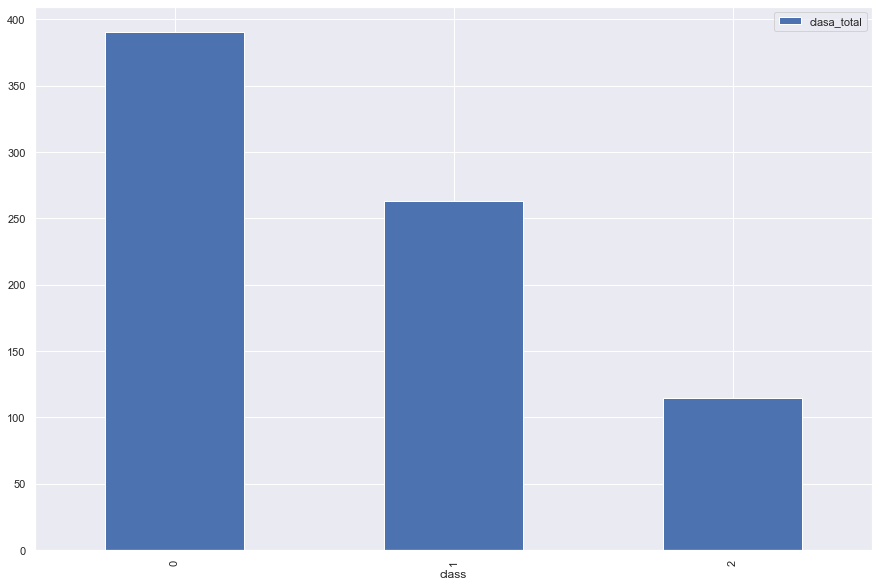

In [643]:
agregari.plot.bar() 

Din tabel, cat si din grafic se poate observa faptul ca 390 de cladiri sunt eficiente din punct de vedere al consumului energetic, 263 sunt neutre din punct de vedere energetic, iar restul de 115 nu sunt eficiente

# 2.Regresie Liniara

Regresia este o metodă de modelare a unei valori țintă bazată pe predictori independenți


# 2.1 Regresie Liniara Simpla

Formula => y = a + bx, unde a = constanta, b = coef. de determinare(r_patrat) 

În cazul nostru, dorim să vedem corelația dintre Heating Load și Cooling Load

In [644]:
x=data['Heating_Load'].values.reshape(-1,1)
y=data['Cooling_Load'].values

print(x)
print(y)


[[15.55]
 [15.55]
 [15.55]
 [15.55]
 [20.84]
 [21.46]
 [20.71]
 [19.68]
 [19.5 ]
 [19.95]
 [19.34]
 [18.31]
 [17.05]
 [17.41]
 [16.95]
 [15.98]
 [28.52]
 [29.9 ]
 [29.63]
 [28.75]
 [24.77]
 [23.93]
 [24.77]
 [23.93]
 [ 6.07]
 [ 6.05]
 [ 6.01]
 [ 6.04]
 [ 6.37]
 [ 6.4 ]
 [ 6.37]
 [ 6.4 ]
 [ 6.85]
 [ 6.79]
 [ 6.77]
 [ 6.81]
 [ 7.18]
 [ 7.1 ]
 [ 7.1 ]
 [ 7.1 ]
 [10.85]
 [10.54]
 [10.77]
 [10.56]
 [ 8.6 ]
 [ 8.49]
 [ 8.45]
 [ 8.5 ]
 [24.58]
 [24.63]
 [24.63]
 [24.59]
 [29.03]
 [29.87]
 [29.14]
 [28.09]
 [26.28]
 [26.91]
 [26.37]
 [25.27]
 [23.53]
 [24.03]
 [23.54]
 [22.58]
 [35.56]
 [37.12]
 [36.9 ]
 [35.94]
 [32.96]
 [32.12]
 [32.94]
 [32.21]
 [10.36]
 [10.43]
 [10.36]
 [10.39]
 [10.71]
 [10.8 ]
 [10.7 ]
 [10.75]
 [11.11]
 [11.13]
 [11.09]
 [11.16]
 [11.68]
 [11.69]
 [11.7 ]
 [11.69]
 [15.41]
 [15.2 ]
 [15.42]
 [15.21]
 [12.96]
 [12.97]
 [12.93]
 [13.02]
 [24.29]
 [24.31]
 [24.13]
 [24.25]
 [28.88]
 [29.68]
 [28.83]
 [27.9 ]
 [26.48]
 [27.02]
 [26.33]
 [25.36]
 [23.75]
 [24.23]
 [23.67]
 

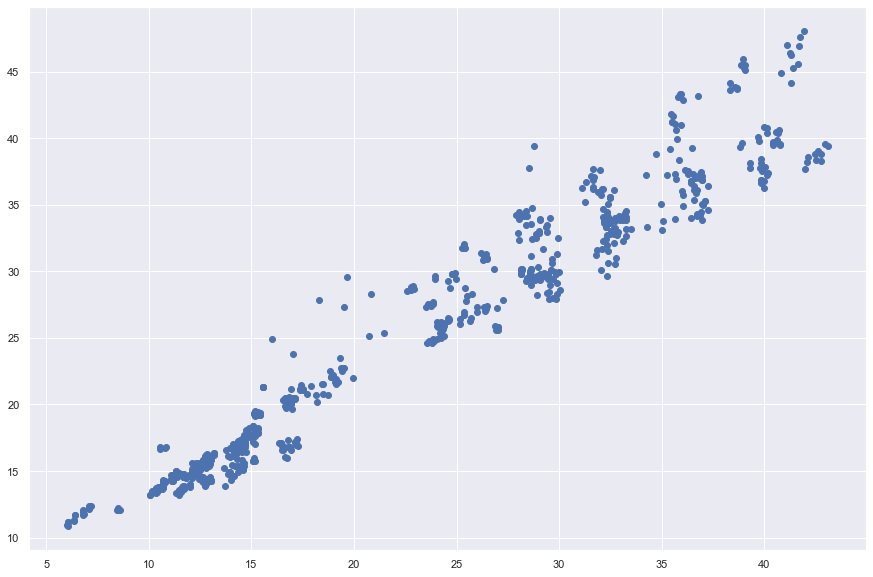

In [645]:
plt.scatter(x,y)

Vom antrena setul de date si vom calcula un scor.

r_patrat reprezinta procentul din variatia totala care este explicata de variabilele independente

In [646]:
model=LinearRegression()
model.fit(x,y)

r_patrat = model.score(x,y)

print("coef de determinare: ", r_patrat)
print("constanta/intercept: ", model.intercept_)
print("panta/slope: ", model.coef_)

coef de determinare:  0.9523062789164656
constanta/intercept:  4.063607085253352
panta/slope:  [0.92006854]


In [647]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=42)

print(x_train)
print (y_train)

[[15.08]
 [15.19]
 [32.31]
 [41.67]
 [29.63]
 [43.1 ]
 [12.88]
 [13.17]
 [10.34]
 [32.23]
 [11.16]
 [24.03]
 [31.28]
 [29.92]
 [ 6.4 ]
 [15.16]
 [40.42]
 [14.6 ]
 [36.43]
 [14.34]
 [11.53]
 [32.13]
 [36.57]
 [12.91]
 [10.72]
 [29.4 ]
 [16.48]
 [19.48]
 [16.74]
 [12.41]
 [14.21]
 [11.22]
 [13.99]
 [15.12]
 [36.7 ]
 [27.03]
 [32.15]
 [10.36]
 [33.28]
 [42.08]
 [26.48]
 [36.97]
 [12.63]
 [12.96]
 [14.34]
 [15.2 ]
 [12.46]
 [14.61]
 [19.13]
 [14.71]
 [11.64]
 [18.31]
 [10.56]
 [10.77]
 [33.24]
 [32.74]
 [18.48]
 [14.66]
 [11.1 ]
 [14.62]
 [12.78]
 [11.16]
 [36.47]
 [31.29]
 [36.71]
 [19.2 ]
 [29.47]
 [15.98]
 [14.61]
 [37.03]
 [31.63]
 [12.35]
 [12.49]
 [25.43]
 [29.49]
 [32.33]
 [36.45]
 [16.66]
 [19.95]
 [26.45]
 [24.77]
 [10.68]
 [14.16]
 [12.42]
 [14.12]
 [16.83]
 [39.32]
 [27.03]
 [35.69]
 [12.97]
 [12.87]
 [15.09]
 [16.76]
 [12.59]
 [15.16]
 [17.15]
 [12.29]
 [26.47]
 [10.39]
 [12.74]
 [11.34]
 [32.96]
 [40.11]
 [12.68]
 [13.69]
 [12.85]
 [15.41]
 [13.94]
 [32.4 ]
 [10.72]
 [32.12]
 

In [648]:
y_prezis = model.predict(x_test)

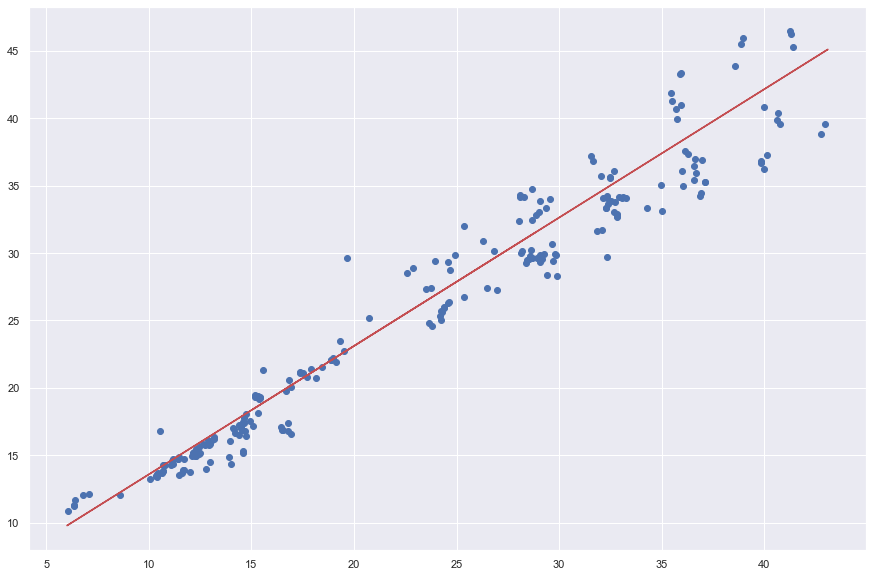

In [649]:
plt.scatter(x_test, y_test)
plt.plot(x_train, model.intercept_ + r_patrat * x_train, 'r')
plt.show()

In [650]:
print("MAR/ eroarea absoluta medie: ", metrics.mean_absolute_error(y_test,y_prezis))
print("MSE/ eroarea patrata medie: ", metrics.mean_squared_error(y_test,y_prezis))
print("RMSE/ eroarea radacina-medie-patrat: ", np.sqrt(metrics.mean_squared_error(y_test,y_prezis)))

r_patrat=model.score(x_train, y_train)
print("r^2", r_patrat)

MAR/ eroarea absoluta medie:  1.4829903061251677
MSE/ eroarea patrata medie:  4.366073655139234
RMSE/ eroarea radacina-medie-patrat:  2.089515172268255
r^2 0.9524674861120723


# 2.2 Regresie Liniara Multipla

Dorim sa prezicem  Heating Load in functie de Surface Area, Wall Area, Roof Area si Overall Height

Formula => y = α1*x1+α2*x2+...+αp*xp+ε, unde x este vectorul variabilelor ndependente de dimensiune 1×p. α este vectorul coeficienţilor, de dimensiune p×1. ε(epsilon)  este  o  variabilă,  interpretată  ca  eroare

In [651]:
coloane_x=['Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height']
x=data[coloane_x]
y=data['Heating_Load']

print(x,y)

     Surface_Area  Wall_Area  Roof_Area  Overall_Height
0           514.5      294.0     110.25             7.0
1           514.5      294.0     110.25             7.0
2           514.5      294.0     110.25             7.0
3           514.5      294.0     110.25             7.0
4           563.5      318.5     122.50             7.0
..            ...        ...        ...             ...
763         784.0      343.0     220.50             3.5
764         808.5      367.5     220.50             3.5
765         808.5      367.5     220.50             3.5
766         808.5      367.5     220.50             3.5
767         808.5      367.5     220.50             3.5

[768 rows x 4 columns] 0      15.55
1      15.55
2      15.55
3      15.55
4      20.84
       ...  
763    17.88
764    16.54
765    16.44
766    16.48
767    16.64
Name: Heating_Load, Length: 768, dtype: float64


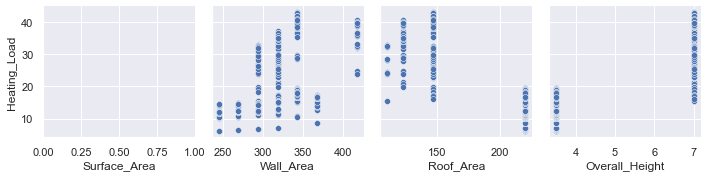

In [652]:
sns.pairplot(data, x_vars=['Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height'], y_vars='Heating_Load', kind='scatter')
plt.show()

In [653]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.2, random_state=5)
print(x_train, x_test, y_train, y_test)

     Surface_Area  Wall_Area  Roof_Area  Overall_Height
140         808.5      367.5     220.50             3.5
358         661.5      416.5     122.50             7.0
143         808.5      367.5     220.50             3.5
674         514.5      294.0     110.25             7.0
121         686.0      245.0     220.50             3.5
..            ...        ...        ...             ...
73          686.0      245.0     220.50             3.5
400         637.0      343.0     147.00             7.0
118         661.5      416.5     122.50             7.0
701         710.5      269.5     220.50             3.5
206         612.5      318.5     147.00             7.0

[614 rows x 4 columns]      Surface_Area  Wall_Area  Roof_Area  Overall_Height
567         759.5      318.5     220.50             3.5
123         686.0      245.0     220.50             3.5
615         759.5      318.5     220.50             3.5
492         612.5      318.5     147.00             7.0
288         514.5      2

In [654]:
model=LinearRegression().fit(x_train, y_train)
coeficienti_df=pd.DataFrame(model.coef_, x.columns, columns=['Coefficient'])
coeficienti_df

,Coefficient
Surface_Area,0.016364
Wall_Area,0.036599
Roof_Area,-0.010117
Overall_Height,5.337499


In [655]:
y_prezis=model.predict(x_test)
df=pd.DataFrame({"Actual: ":y_test,'Prezis':y_prezis})
df

,Actual:,Prezis
567,15.23,13.951488
123,10.45,10.058698
615,15.30,13.951488
492,25.70,30.970830
288,28.15,28.842282
...,...,...
432,28.70,28.842282
480,28.69,28.842282
7,19.68,30.416862
564,15.23,13.951488


<AxesSubplot:>

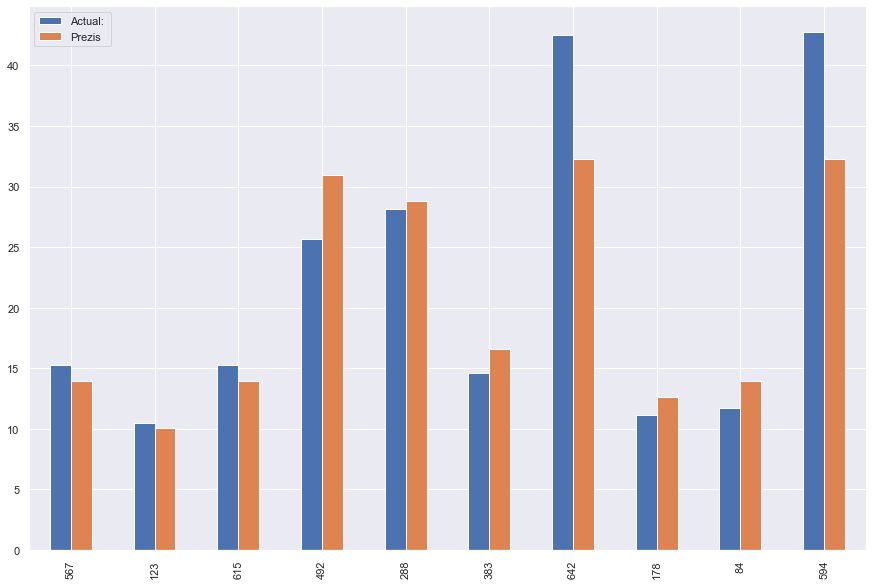

In [656]:
df.head(10).plot(kind='bar')


In [657]:
print("MAR/ eroarea absoluta medie: ", metrics.mean_absolute_error(y_test,y_prezis))
print("MSE/ eroarea patrata medie: ", metrics.mean_squared_error(y_test,y_prezis))
print("RMSE/ eroarea radacina-medie-patrat: ", np.sqrt(metrics.mean_squared_error(y_test,y_prezis)))

r_patrat=model.score(x_train, y_train)
print("r^2", r_patrat)

MAR/ eroarea absoluta medie:  3.265916983884308
MSE/ eroarea patrata medie:  18.64086153330091
RMSE/ eroarea radacina-medie-patrat:  4.317506402230449
r^2 0.8439973104135423


Dorim sa prezicem Cooling Load in functie de Surface Area, Wall Area, Roof Area si Overall Height

In [658]:
coloane_x=['Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height']
x=data[coloane_x]
y=data['Cooling_Load']

print(x,y)

     Surface_Area  Wall_Area  Roof_Area  Overall_Height
0           514.5      294.0     110.25             7.0
1           514.5      294.0     110.25             7.0
2           514.5      294.0     110.25             7.0
3           514.5      294.0     110.25             7.0
4           563.5      318.5     122.50             7.0
..            ...        ...        ...             ...
763         784.0      343.0     220.50             3.5
764         808.5      367.5     220.50             3.5
765         808.5      367.5     220.50             3.5
766         808.5      367.5     220.50             3.5
767         808.5      367.5     220.50             3.5

[768 rows x 4 columns] 0      21.33
1      21.33
2      21.33
3      21.33
4      28.28
       ...  
763    21.40
764    16.88
765    17.11
766    16.61
767    16.03
Name: Cooling_Load, Length: 768, dtype: float64


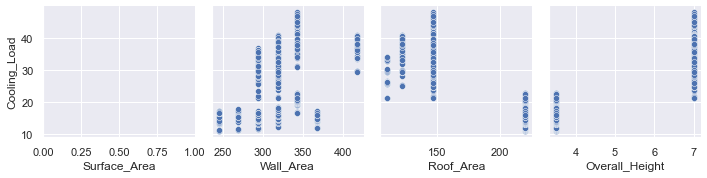

In [659]:
sns.pairplot(data, x_vars=['Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height'], y_vars='Cooling_Load', kind='scatter')
plt.show()

In [660]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.2, random_state=5)
print(x_train, x_test, y_train, y_test)

     Surface_Area  Wall_Area  Roof_Area  Overall_Height
140         808.5      367.5     220.50             3.5
358         661.5      416.5     122.50             7.0
143         808.5      367.5     220.50             3.5
674         514.5      294.0     110.25             7.0
121         686.0      245.0     220.50             3.5
..            ...        ...        ...             ...
73          686.0      245.0     220.50             3.5
400         637.0      343.0     147.00             7.0
118         661.5      416.5     122.50             7.0
701         710.5      269.5     220.50             3.5
206         612.5      318.5     147.00             7.0

[614 rows x 4 columns]      Surface_Area  Wall_Area  Roof_Area  Overall_Height
567         759.5      318.5     220.50             3.5
123         686.0      245.0     220.50             3.5
615         759.5      318.5     220.50             3.5
492         612.5      318.5     147.00             7.0
288         514.5      2

In [661]:
model=LinearRegression().fit(x_train, y_train)
coeficienti_df=pd.DataFrame(model.coef_, x.columns, columns=['Coefficient'])
coeficienti_df

,Coefficient
Surface_Area,0.022464
Wall_Area,0.020301
Roof_Area,0.001082
Overall_Height,5.749398


In [662]:
y_prezis=model.predict(x_test)
df=pd.DataFrame({"Actual: ":y_test,'Prezis':y_prezis})
df

,Actual:,Prezis
567,17.95,16.549859
123,13.79,13.406662
615,18.15,16.549859
492,26.53,33.291024
288,29.79,30.552428
...,...,...
432,29.61,30.552428
480,29.53,30.552428
7,29.60,32.163782
564,18.14,16.549859


<AxesSubplot:>

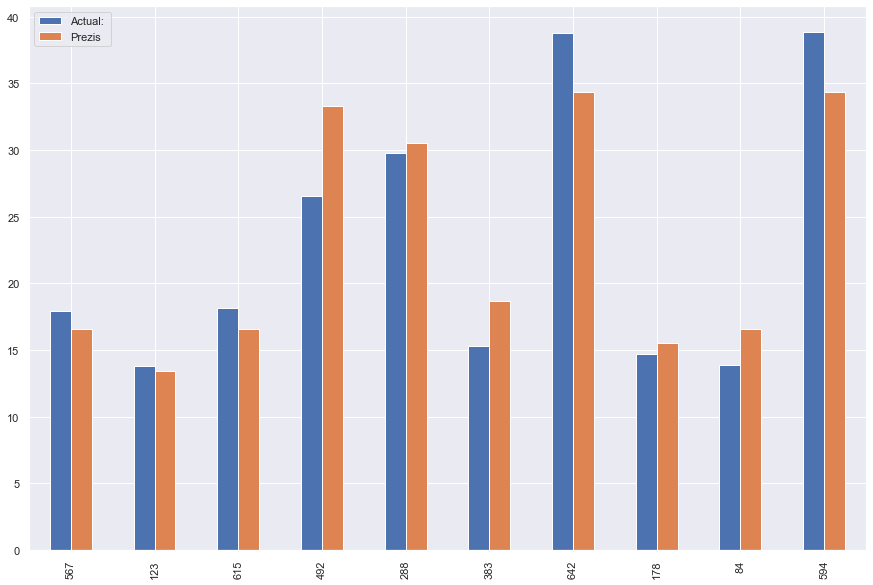

In [663]:
df.head(10).plot(kind='bar')

In [664]:
print("MAR:", metrics.mean_absolute_error(y_test,y_prezis))
print("MSE: ", metrics.mean_squared_error(y_test,y_prezis))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,y_prezis)))
r_patrat=model.score(x_train, y_train)
print("r^2", r_patrat)

MAR: 2.955689372628926
MSE:  15.228573265911734
RMSE:  3.902380461450643
r^2 0.8418390447787307


Dorim sa prezicem Overall Height in functie de Heating Load si Cooling Load

In [665]:
coloane_x=['Heating_Load','Cooling_Load']
x=data[coloane_x]
y=data['Overall_Height']

print(x,y)

     Heating_Load  Cooling_Load
0           15.55         21.33
1           15.55         21.33
2           15.55         21.33
3           15.55         21.33
4           20.84         28.28
..            ...           ...
763         17.88         21.40
764         16.54         16.88
765         16.44         17.11
766         16.48         16.61
767         16.64         16.03

[768 rows x 2 columns] 0      7.0
1      7.0
2      7.0
3      7.0
4      7.0
      ... 
763    3.5
764    3.5
765    3.5
766    3.5
767    3.5
Name: Overall_Height, Length: 768, dtype: float64


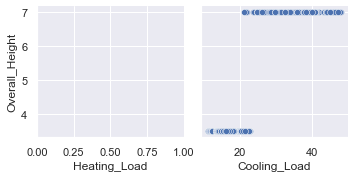

In [666]:
sns.pairplot(data, x_vars=['Heating_Load','Cooling_Load'], y_vars='Overall_Height', kind='scatter')
plt.show()

In [667]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.2, random_state=5)
print(x_train, x_test, y_train, y_test)

     Heating_Load  Cooling_Load
140         12.88         14.37
358         36.86         37.28
143         13.04         14.24
674         32.21         33.95
121         10.46         13.72
..            ...           ...
73          10.43         13.71
400         39.04         45.13
118         33.12         34.17
701         14.70         17.20
206         23.59         27.57

[614 rows x 2 columns]      Heating_Load  Cooling_Load
567         15.23         17.95
123         10.45         13.79
615         15.30         18.15
492         25.70         26.53
288         28.15         29.79
..            ...           ...
432         28.70         29.61
480         28.69         29.53
7           19.68         29.60
564         15.23         18.14
40          10.85         16.78

[154 rows x 2 columns] 140    3.5
358    7.0
143    3.5
674    7.0
121    3.5
      ... 
73     3.5
400    7.0
118    7.0
701    3.5
206    7.0
Name: Overall_Height, Length: 614, dtype: float64 567    3.5
12

In [668]:
model=LinearRegression().fit(x_train, y_train)
coeficienti_df=pd.DataFrame(model.coef_, x.columns, columns=['Coefficient'])
coeficienti_df

,Coefficient
Heating_Load,0.057878
Cooling_Load,0.104569


In [669]:
y_prezis=model.predict(x_test)
df=pd.DataFrame({"Actual: ":y_test,'Prezis':y_prezis})
df

,Actual:,Prezis
567,3.5,4.141562
123,3.5,3.429896
615,3.5,4.166527
492,7.0,5.644752
288,7.0,6.127449
...,...,...
432,7.0,6.140460
480,7.0,6.131516
7,7.0,5.617352
564,3.5,4.161430


<AxesSubplot:>

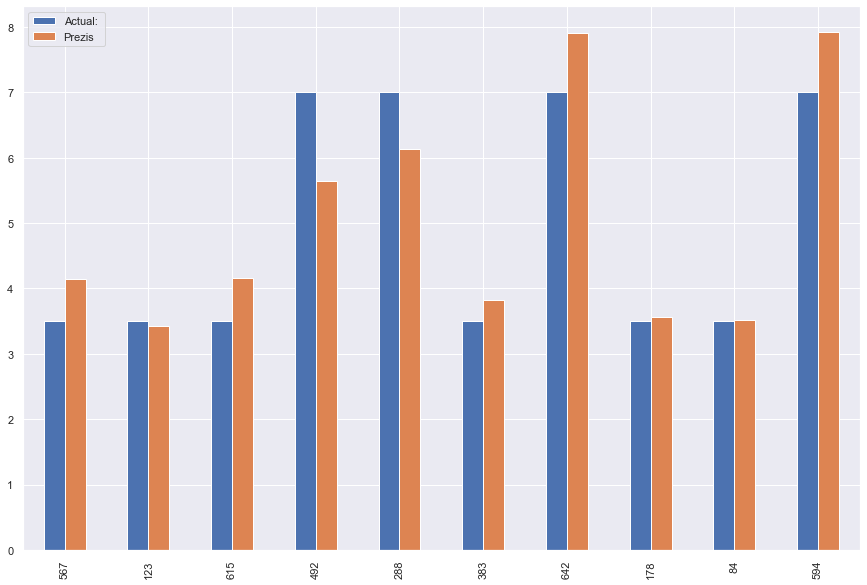

In [670]:
df.head(10).plot(kind='bar')


In [671]:
print("MAR/ eroarea absoluta medie: ", metrics.mean_absolute_error(y_test,y_prezis))
print("MSE/ eroarea patrata medie: ", metrics.mean_squared_error(y_test,y_prezis))
print("RMSE/ eroarea radacina-medie-patrat: ", np.sqrt(metrics.mean_squared_error(y_test,y_prezis)))

r_patrat=model.score(x_train, y_train)
print("r^2", r_patrat)

MAR/ eroarea absoluta medie:  0.6218321329991052
MSE/ eroarea patrata medie:  0.6215351388639067
RMSE/ eroarea radacina-medie-patrat:  0.7883749988830865
r^2 0.8098683931941875


# 3.Clasificare

# 3.1 Prezicerea Heating Load

Aici vrem sa prezicem Heating_Load-ul, folosindu-ne de restul datelor din dataframe 
Grupam setul de date intr-un set de test (30% din total) si restul de 70% intr-un set de antrenament. Random state este folosit pentru a avea aceleasi valori atunci cand rulam programul din nou

In [672]:
x=data.drop(['Heating_Load'], axis =1)
y=data['Heating_Load']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=100)


Ne vom folosi de 10 vecini si vom antrena setul de date.
Am convertit datele din float in int pentru a evita eroarea ” Unknown label type: 'continuous'”, deoarece fit() accepta doar valori de tip integer

La final, comparam scorul pe setul de antrenament cu scorul pe setul de test 

In [673]:
model = KNeighborsClassifier(n_neighbors=10)
model.fit(x_train, y_train.astype('int'))

print("Scorul pe setul de antrenament:" ,model.score(x_train, y_train.astype('int')) )
 
print("Scorul pe setul de test:",model.score(x_test, y_test.astype('int')) )

Scorul pe setul de antrenament: 0.5791433891992551
Scorul pe setul de test: 0.4805194805194805


In [674]:
k_interval = range(1,30)

scoruri = []

for k in k_interval:
    knn = KNeighborsClassifier(n_neighbors=k)  
    knn.fit(x_train, y_train.astype('int'))              
    y_prezis = knn.predict(x_test.astype('int'))
    scoruri.append(metrics.accuracy_score(y_test.astype('int'), y_prezis.astype('int')))
scoruri

[0.48917748917748916,
 0.4588744588744589,
 0.4805194805194805,
 0.47619047619047616,
 0.42857142857142855,
 0.4025974025974026,
 0.45021645021645024,
 0.4199134199134199,
 0.4199134199134199,
 0.4329004329004329,
 0.4199134199134199,
 0.4155844155844156,
 0.4329004329004329,
 0.4199134199134199,
 0.4199134199134199,
 0.4025974025974026,
 0.4069264069264069,
 0.3939393939393939,
 0.38095238095238093,
 0.38961038961038963,
 0.38095238095238093,
 0.36796536796536794,
 0.36796536796536794,
 0.3463203463203463,
 0.341991341991342,
 0.3333333333333333,
 0.31601731601731603,
 0.31601731601731603,
 0.30735930735930733]

<AxesSubplot:>

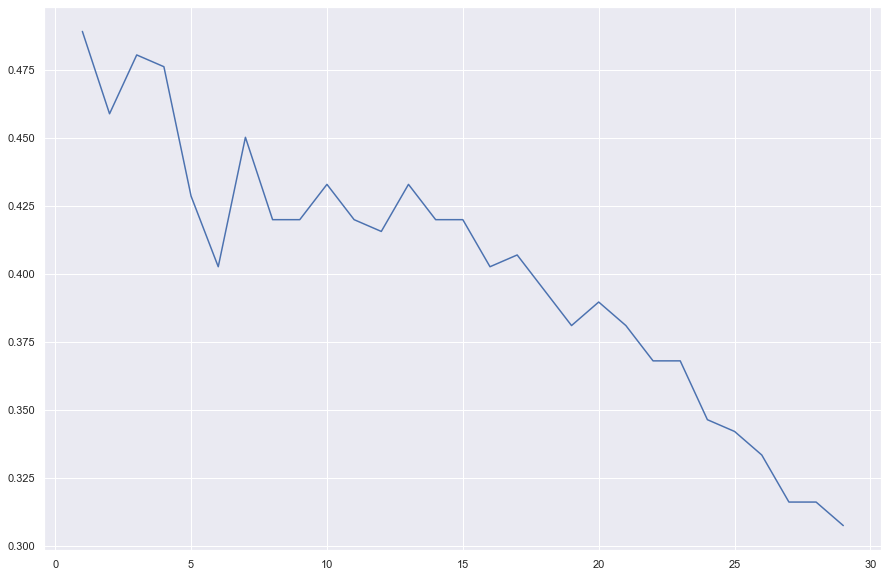

In [675]:
sns.lineplot(x=k_interval, y=scoruri)

Cu cat alegem mai multi vecini cu atat va scadea acuratetea

# 3.2 Prezicerea Cooling Load

Aici vrem sa prezicem Cooling_Load-ul, folosindu-ne de restul datelor din dataframe. Algoritmul este acelasi

In [676]:
x=data.drop(['Cooling_Load'], axis =1)
y=data['Cooling_Load']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=100)


In [677]:
model = KNeighborsClassifier(n_neighbors=10)
model.fit(x_train, y_train.astype('int'))

print("Scorul pe setul de antrenament:" ,model.score(x_train, y_train.astype('int')) )
 
print("Scorul pe setul de test:",model.score(x_test, y_test.astype('int')) )

Scorul pe setul de antrenament: 0.5381750465549349
Scorul pe setul de test: 0.36363636363636365


In [678]:
k_interval = range(1,30)

scoruri = []

for k in k_interval:
    knn = KNeighborsClassifier(n_neighbors=k)  #instantiere
    knn.fit(x_train, y_train.astype('int'))               #antrenare
    y_prezis = knn.predict(x_test.astype('int'))
    scoruri.append(metrics.accuracy_score(y_test.astype('int'), y_prezis.astype('int')))
scoruri

[0.44155844155844154,
 0.42424242424242425,
 0.42857142857142855,
 0.42857142857142855,
 0.37662337662337664,
 0.3722943722943723,
 0.37662337662337664,
 0.3333333333333333,
 0.35064935064935066,
 0.329004329004329,
 0.341991341991342,
 0.3333333333333333,
 0.3246753246753247,
 0.329004329004329,
 0.31601731601731603,
 0.2943722943722944,
 0.31601731601731603,
 0.3203463203463203,
 0.30735930735930733,
 0.30735930735930733,
 0.30735930735930733,
 0.2813852813852814,
 0.2813852813852814,
 0.2857142857142857,
 0.2857142857142857,
 0.2813852813852814,
 0.2510822510822511,
 0.22510822510822512,
 0.22510822510822512]

<AxesSubplot:>

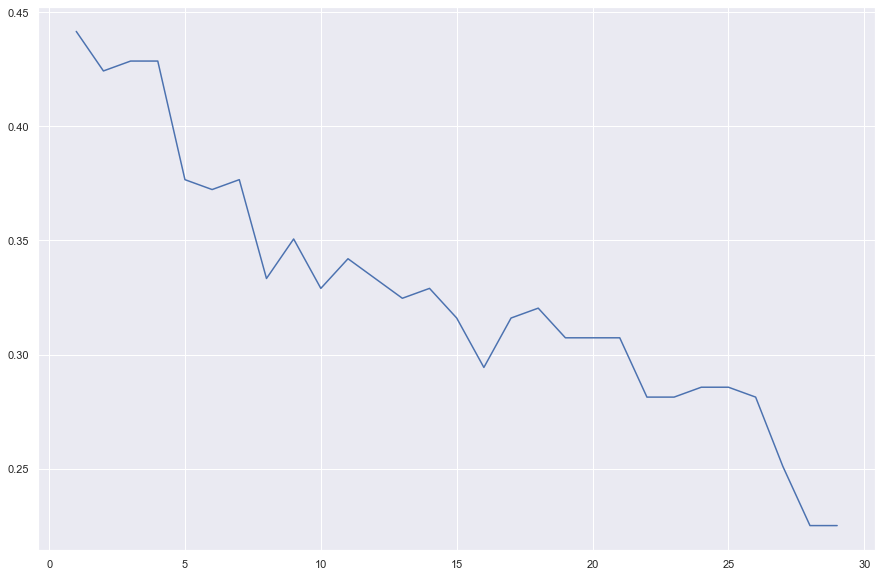

In [679]:
sns.lineplot(x=k_interval, y=scoruri)

# 4. Clustering - KMeans

Clustering este o tehnica de învatare automata nesupervizata care separa sau imparte punctele de date in mai multe clustere sau grupuri 

Algoritmul K-means este o metoda de determinare a clusterelor 

Dorim sa aflam numarul de clustere dintre ”Heating_Load” si ”Cooling_Load”

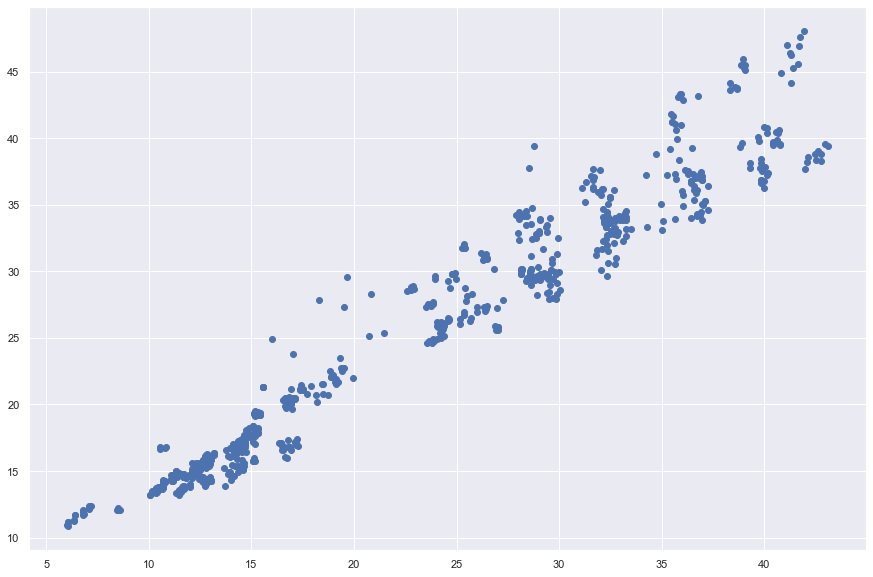

In [680]:
plt.scatter(data['Heating_Load'], data['Cooling_Load'])

Aici putem specula faptul ca avem 3 clustere, insa dorim sa avem demonstram acest lucru folosind Elbow Method

In [681]:
scaler = MinMaxScaler()
scaler.fit(data[['Heating_Load']])
data['Heating_Load']=scaler.transform(data[['Heating_Load']])

scaler.fit(data[['Cooling_Load']])
data['Cooling_Load']=scaler.transform(data[['Cooling_Load']])

In [682]:
k_rng = range(1,10)
srp = []
for k in k_rng:
    km=KMeans(n_clusters = k)
    km.fit(data[['Heating_Load','Cooling_Load' ]])
    srp.append(km.inertia_)

In analiza clusterelor, metoda cotului este utilizata în determinarea numarului de clustere dintr-un set de date. Pentru a determina numărul optim de clustere, trebuie să selectăm valoarea lui k la „cot”, adică punctul după care inerția începe să scadă în mod liniar.

Text(0.5, 1.0, 'Elbow Method')

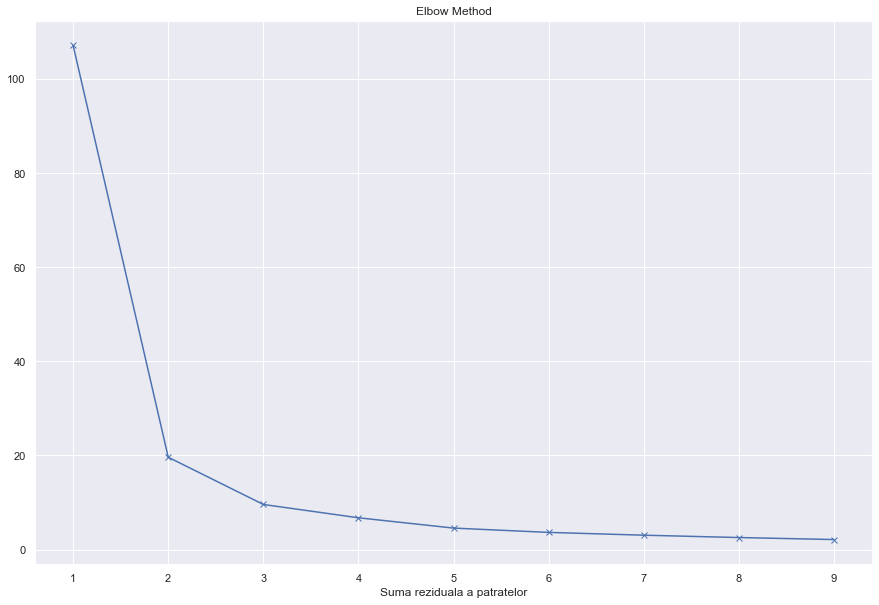

In [691]:
plt.xlabel('k')
plt.xlabel('Suma reziduala a patratelor')
plt.plot(k_rng,srp,'bx-')
plt.title('Elbow Method')

In [684]:
km = KMeans(n_clusters =3)
y_predicted = km.fit_predict(data[['Heating_Load','Cooling_Load']])
y_predicted

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 1, 2, 2, 1, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2,

In [685]:
data['cluster']= y_predicted

In [686]:
data.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load,cluster
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,0.257212,0.280905,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,0.257212,0.280905,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,0.257212,0.280905,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,0.257212,0.280905,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,0.399838,0.468085,2


Text(0, 0.5, 'Cooling_Load')

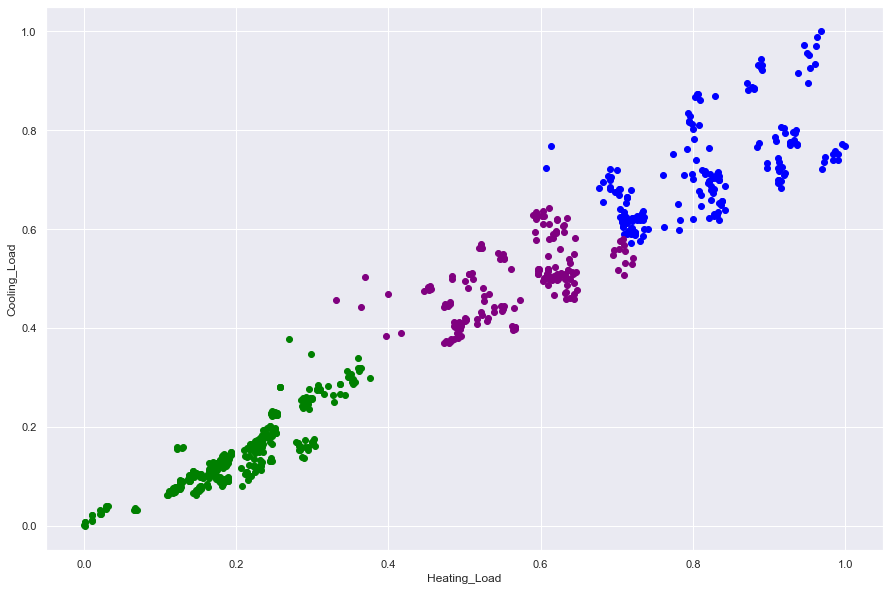

In [687]:
df1 = data[data.cluster==0]
df2 = data[data.cluster==1]
df3 = data[data.cluster==2]

plt.scatter(df1.Heating_Load,df1['Cooling_Load'], color= 'green')
plt.scatter(df2.Heating_Load,df2['Cooling_Load'], color= 'blue')
plt.scatter(df3.Heating_Load,df3['Cooling_Load'], color= 'purple')


plt.xlabel('Heating_Load')
plt.ylabel('Cooling_Load')

Fiecare cluster are un centroid. Algoritmul lucreaza cu K clustere, deci K dintre punctele folosite la instruire vor fi centriozii celor K clustere. Intrucat initializarea centroizilor se face aleator, exista posibilitatea ca mai multe rulari ale algoritmului sa duca la rezultate diferite.

In [688]:
km.cluster_centers_

array([[0.20001629, 0.14347518],
       [0.81140116, 0.7138214 ],
       [0.56651447, 0.49316756]])

Text(0, 0.5, 'Cooling_Load')

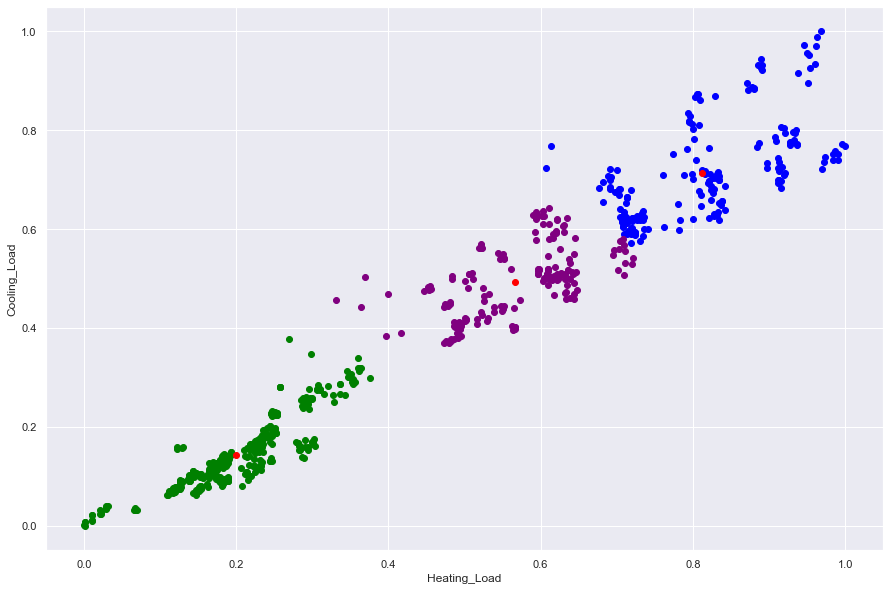

In [689]:
df1 = data[data.cluster==0]
df2 = data[data.cluster==1]
df3 = data[data.cluster==2]

plt.scatter(df1.Heating_Load,df1['Cooling_Load'], color= 'green')
plt.scatter(df2.Heating_Load,df2['Cooling_Load'], color= 'blue')
plt.scatter(df3.Heating_Load,df3['Cooling_Load'], color= 'purple')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='red', marker = 'o', label='centroid')

plt.xlabel('Heating_Load')
plt.ylabel('Cooling_Load')